__Name: Subhiksha Rani ; USC ID: 9907399097__

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error

__Reading sheet1 of input file 'Folds5x2_pp.xlsx' and saving it into a DataFrame__

In [2]:
name = 'Folds5x2_pp.xlsx'
file = pd.ExcelFile(name)
data = file.parse('Sheet1')

In [3]:
data.shape

(9568, 5)

__1. b. i)Number of rows in the dataset = 9568 ; Number of columns in the dataset = 5. The columns represent the variables from the Combined Cycle Power Plant collected from year 2006-2011. The rows are the features of these variables.__

<br>__1. b. ii)Pairwise Scatterplots:__

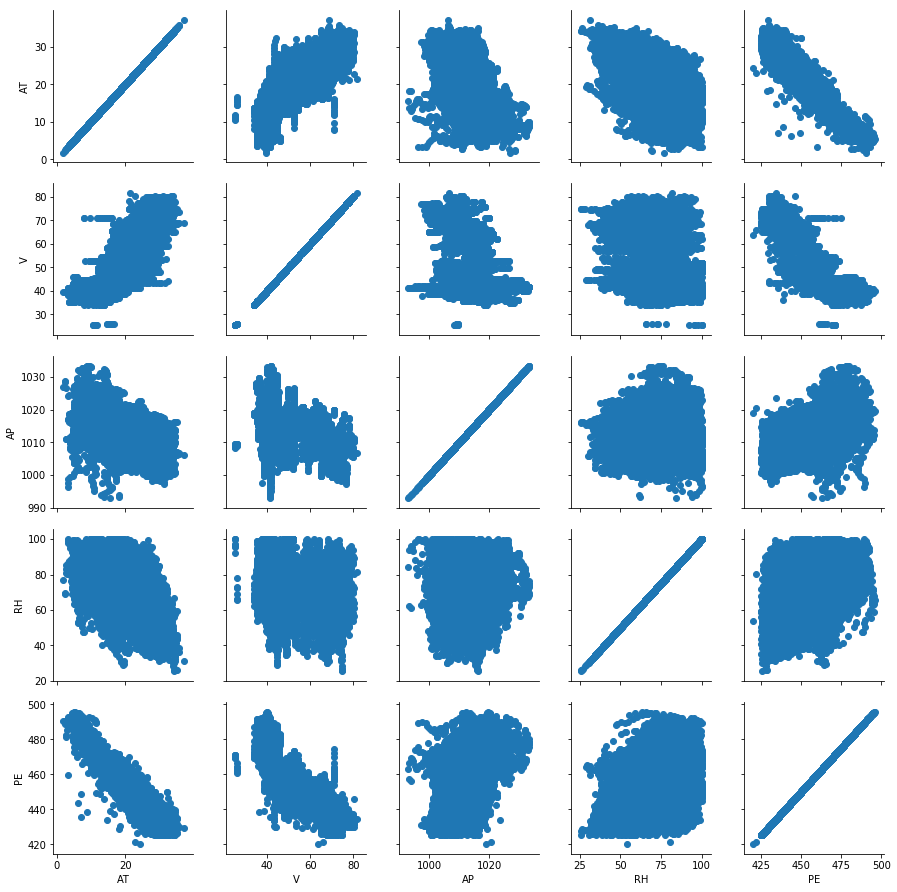

In [4]:
var1 = sns.PairGrid(data)
var1 = var1.map(plt.scatter)

__From the scatterplots, we can see that the graph of Ambient Temperature(AT) vs Energy Output(PE) is the most linear one.<br><br>__

In [5]:
table = pd.DataFrame()
data1 = ['Mean','Median','Range','First Quartile','Third Quartile','Interquartile Range']
data2 = [data['AT'].mean(),data['AT'].median(),data['AT'].max()-data['AT'].min(),data['AT'].quantile(0.25),data['AT'].quantile(0.75),data['AT'].quantile(0.75)-data['AT'].quantile(0.25)]
data3 = [data['AP'].mean(),data['AP'].median(),data['AP'].max()-data['AP'].min(),data['AP'].quantile(0.25),data['AP'].quantile(0.75),data['AP'].quantile(0.75)-data['AP'].quantile(0.25)]
data4 = [data['RH'].mean(),data['RH'].median(),data['RH'].max()-data['RH'].min(),data['RH'].quantile(0.25),data['RH'].quantile(0.75),data['RH'].quantile(0.75)-data['RH'].quantile(0.25)]
data5 = [data['V'].mean(),data['V'].median(),data['V'].max()-data['V'].min(),data['V'].quantile(0.25),data['V'].quantile(0.75),data['V'].quantile(0.75)-data['V'].quantile(0.25)]
data6 = [data['PE'].mean(),data['PE'].median(),data['PE'].max()-data['PE'].min(),data['PE'].quantile(0.25),data['PE'].quantile(0.75),data['PE'].quantile(0.75)-data['PE'].quantile(0.25)]
table.insert(0,"Features",data1)
table.insert(1,"Temperature",data2)
table.insert(2,"Ambient Pressure",data3)
table.insert(3,"Relative Humidity",data4)
table.insert(4,"Exhaust Vacuum",data5)
table.insert(5,"Energy Output",data6)

__1. b. iii)Summarizing the Mean, Median, Range, First Quartile, Third Quartile, Interquartile Ranges in table format:__

In [6]:
table

,Features,Temperature,Ambient Pressure,Relative Humidity,Exhaust Vacuum,Energy Output
0,Mean,19.651231,1013.259078,73.308978,54.305804,454.365009
1,Median,20.345000,1012.940000,74.975000,52.080000,451.550000
2,Range,35.300000,40.410000,74.600000,56.200000,75.500000
3,First Quartile,13.510000,1009.100000,63.327500,41.740000,439.750000
4,Third Quartile,25.720000,1017.260000,84.830000,66.540000,468.430000
5,Interquartile Range,12.210000,8.160000,21.502500,24.800000,28.680000


__<br><br>1. c) Simple Linear Regression Models__

In [7]:
Training_set = data.head(8001)
Test_set = data.tail(1567)

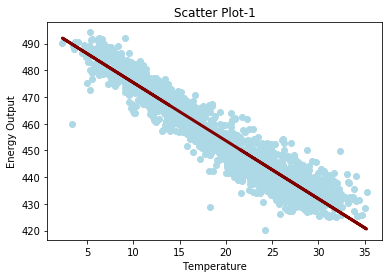

In [102]:
X_train1 = Training_set.iloc[:,0:1].values
X_test1 = Test_set.iloc[:,0:1].values

y_train1 = Training_set.iloc[:,-1].values
y_test1 = Test_set.iloc[:,-1].values

regr1 = linear_model.LinearRegression()

regr1.fit(X_train1, y_train1)

y_pred1 = regr1.predict(X_test1)

test_error1 = regr1.score(X_test1,y_test1)
plt.scatter(X_test1, y_test1,  color='LightBlue')
plt.plot(X_test1, y_pred1, color='Maroon', linewidth=3)
plt.title('Scatter Plot-1')
plt.xlabel('Temperature')
plt.ylabel('Energy Output')
plt.show()

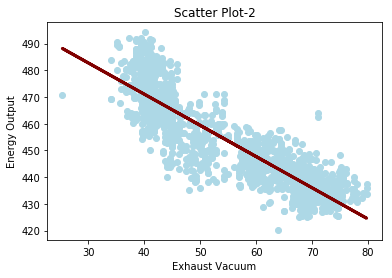

In [106]:
X_train2= Training_set.iloc[:,1:2].values
X_test2= Test_set.iloc[:,1:2].values

y_train2 = Training_set.iloc[:,-1].values
y_test2 = Test_set.iloc[:,-1].values

regr2 = linear_model.LinearRegression()

regr2.fit(X_train2, y_train2)

y_pred2 = regr2.predict(X_test2)
test_error1 = np.append(test_error1,regr2.score(X_test2,y_test2))
plt.scatter(X_test2, y_test2,  color='LightBlue')
plt.plot(X_test2, y_pred2, color='Maroon', linewidth=3)
plt.title('Scatter Plot-2')
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Energy Output')
plt.show()

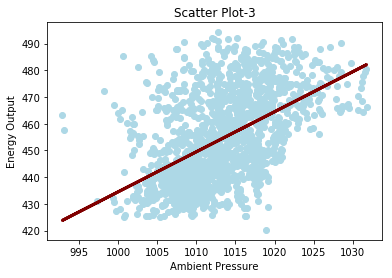

In [108]:
X_train3= Training_set.iloc[:,2:3].values
X_test3= Test_set.iloc[:,2:3].values

y_train3 = Training_set.iloc[:,-1].values
y_test3 = Test_set.iloc[:,-1].values

regr3 = linear_model.LinearRegression()

regr3.fit(X_train3, y_train3)

y_pred3 = regr3.predict(X_test3)
test_error1 = np.append(test_error1,regr3.score(X_test3,y_test3))
plt.scatter(X_test3, y_test3,  color='LightBlue')
plt.plot(X_test3, y_pred3, color='Maroon', linewidth=3)
plt.title('Scatter Plot-3')
plt.xlabel('Ambient Pressure')
plt.ylabel('Energy Output')
plt.show()

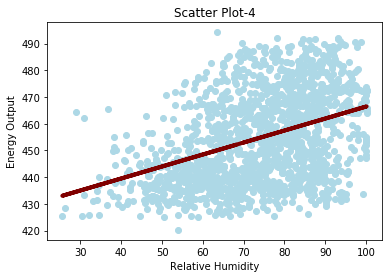

In [109]:
X_train4= Training_set.iloc[:,3:4].values
X_test4= Test_set.iloc[:,3:4].values

y_train4 = Training_set.iloc[:,-1].values
y_test4 = Test_set.iloc[:,-1].values

regr4 = linear_model.LinearRegression()

regr4.fit(X_train4, y_train4)

y_pred4 = regr4.predict(X_test4)
test_error1 = np.append(test_error1,regr4.score(X_test4,y_test4))
plt.scatter(X_test4, y_test4,  color='LightBlue')
plt.plot(X_test4, y_pred4, color='Maroon', linewidth=4)
plt.title('Scatter Plot-4')
plt.xlabel('Relative Humidity')
plt.ylabel('Energy Output')
plt.show()

<br>__1. d) Multiple Regression model:__

In [110]:
X_train5= Training_set.iloc[:,0:4]
X_test5= Test_set.iloc[:,0:4]

y_train5 = Training_set.iloc[:,-1]
y_test5 = Test_set.iloc[:,-1]

regr5 = linear_model.LinearRegression()

regr5.fit(X_train5, y_train5)

y_pred5 = regr5.predict(X_test5)
test_error1 = np.append(test_error1,regr5.score(X_test5,y_test5))
model=sm.OLS(y_train5,X_train5)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.628e+07
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:27:32   Log-Likelihood:                -24291.
No. Observations:                8001   AIC:                         4.859e+04
Df Residuals:                    7997   BIC:                         4.862e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.6886      0.017   -101.117      0.000      -1.721      -1.656
V             -0.2686      0.009    -30.793      0.000      -0.286      -0.252
AP             0.5031      0.000   1115.179      0.000       0.502       0.504
RH            -0.1040      0.005    -21.681      0.000      -0.113      -0.095
==============================================================================
Omnibus:                      462.333   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1484.579
Skew:                          -0.246   Prob(JB):                         0.00
Kurtosis:                       5.052   Cond. No.                         335.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__To reject null hypothesis, the p-value need to be greater than or equal to alpha. The commonly used value for alpha is 5% or 0.05. According to the table above all our p-values are less than 0.05. So we can reject null hypothesis for all the variables.<br><br>__

__<br>1. e) Univariate regression coefficients vs Multiple regression coefficients__

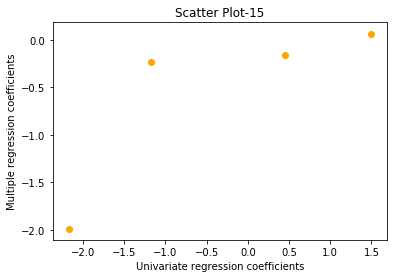

In [13]:
reg_coef = regr1.coef_
reg_coef = np.append(reg_coef,regr2.coef_)
reg_coef = np.append(reg_coef,regr3.coef_)
reg_coef = np.append(reg_coef,regr4.coef_)
reg_coef_multi = regr5.coef_
plt.scatter(reg_coef, reg_coef_multi,  color='Orange')
plt.title('Scatter Plot-15')
plt.xlabel('Univariate regression coefficients')
plt.ylabel('Multiple regression coefficients')
plt.show()

__<br><br>1. f) Polynomial regression of degree 3__

In [113]:
X_train8= Training_set.iloc[:,0:1].values
X_test8= Test_set.iloc[:,0:1].values

y_train8 = Training_set.iloc[:,-1].values
y_test8 = Test_set.iloc[:,-1].values

poly8 = PolynomialFeatures(degree=3)
X_trans8 = poly8.fit_transform(X_train8)
X8_ = poly8.fit_transform(X_test8)

clf8 = linear_model.LinearRegression()
clf8.fit(X_trans8, y_train8)
y_pred8 = clf8.predict(X8_)
test_error1 = np.append(test_error1,clf8.score(X8_,y_test8))
print(y_pred8)

[467.60506183 468.8421109  437.59023683 ... 432.96672197 442.07273993
 448.17053748]


In [114]:
X_train9= Training_set.iloc[:,1:2].values
X_test9= Test_set.iloc[:,1:2].values

y_train9 = Training_set.iloc[:,-1].values
y_test9 = Test_set.iloc[:,-1].values

poly9 = PolynomialFeatures(degree=3)
X_trans9 = poly9.fit_transform(X_train9)
X9_ = poly9.fit_transform(X_test9)

clf9 = linear_model.LinearRegression()
clf9.fit(X_trans9, y_train9)
y_pred9 = clf9.predict(X9_)
test_error1 = np.append(test_error1,clf9.score(X9_,y_test9))
print(y_pred9)

[463.62835787 436.19470195 434.28992834 ... 434.92805895 437.09099398
 442.28146452]


In [115]:
X_train10= Training_set.iloc[:,2:3].values
X_test10= Test_set.iloc[:,2:3].values

y_train10 = Training_set.iloc[:,-1].values
y_test10 = Test_set.iloc[:,-1].values

poly10 = PolynomialFeatures(degree=3)
X_trans10 = poly10.fit_transform(X_train10)
X10_ = poly10.fit_transform(X_test10)

clf10 = linear_model.LinearRegression()
clf10.fit(X_trans10, y_train10)
y_pred10 = clf10.predict(X10_)
test_error1 = np.append(test_error1,clf10.score(X10_,y_test10))
print(y_pred10)

[457.75612221 466.21471515 445.39788652 ... 452.33380421 454.21164336
 461.30040258]


In [116]:
X_train11= Training_set.iloc[:,3:4].values
X_test11= Test_set.iloc[:,3:4].values

y_train11 = Training_set.iloc[:,-1].values
y_test11 = Test_set.iloc[:,-1].values

poly11 = PolynomialFeatures(degree=3)
X_trans11 = poly11.fit_transform(X_train11)
X11_ = poly11.fit_transform(X_test11)

clf11 = linear_model.LinearRegression()
clf11.fit(X_trans11, y_train11)
y_pred11 = clf11.predict(X11_)
test_error1 = np.append(test_error1,clf11.score(X11_,y_test11))
print(y_pred11)

[452.66701811 455.37892873 462.41274338 ... 441.34288255 448.79990358
 451.59213477]


__<br>1. g) Full linear regression model with all pairwise interaction terms:__

In [118]:
X_train12= Training_set.iloc[:,0:1].values
X_test12= Test_set.iloc[:,0:1].values

y_train12 = Training_set.iloc[:,-1].values
y_test12 = Test_set.iloc[:,-1].values

poly12 = PolynomialFeatures(interaction_only=True,include_bias = False)
X_trans12 = poly12.fit_transform(X_train12)

clf12 = linear_model.LinearRegression()
clf12.fit(X_trans12, y_train12)
y_pred12 = clf12.predict(X_test12)
test_error1 = np.append(test_error1,clf12.score(X_test12,y_test12))
print(y_pred12)

[467.16228545 468.22777257 438.28540998 ... 429.0221954  443.89552584
 450.15798076]


In [119]:
X_train13= Training_set.iloc[:,1:2].values
X_test13= Test_set.iloc[:,1:2].values

y_train13 = Training_set.iloc[:,-1].values
y_test13 = Test_set.iloc[:,-1].values

poly13 = PolynomialFeatures(interaction_only=True,include_bias = False)
X_trans13 = poly13.fit_transform(X_train13)

clf13 = linear_model.LinearRegression()
clf13.fit(X_trans13, y_train13)
y_pred13 = clf13.predict(X_test13)
test_error1 = np.append(test_error1,clf13.score(X_test13,y_test13))
print(y_pred13)

[464.61845694 434.67102307 427.62525537 ... 430.94366006 436.64570755
 444.74308238]


In [120]:
X_train14= Training_set.iloc[:,2:3].values
X_test14= Test_set.iloc[:,2:3].values

y_train14 = Training_set.iloc[:,-1].values
y_test14 = Test_set.iloc[:,-1].values

poly14 = PolynomialFeatures(interaction_only=True,include_bias = False)
X_trans14 = poly14.fit_transform(X_train14)

clf14 = linear_model.LinearRegression()
clf14.fit(X_trans14, y_train14)
y_pred14 = clf14.predict(X_test14)
test_error1 = np.append(test_error1,clf14.score(X_test14,y_test14))
print(y_pred14)

[457.81922401 463.925764   447.54163215 ... 453.85822511 455.26858078
 460.3248559 ]


In [121]:
X_train15= Training_set.iloc[:,3:4].values
X_test15= Test_set.iloc[:,3:4].values

y_train15 = Training_set.iloc[:,-1].values
y_test15 = Test_set.iloc[:,-1].values

poly15 = PolynomialFeatures(interaction_only=True,include_bias = False)
X_trans15 = poly15.fit_transform(X_train15)

clf15 = linear_model.LinearRegression()
clf15.fit(X_trans15, y_train15)
y_pred15 = clf15.predict(X_test15)
test_error1 = np.append(test_error1,clf15.score(X_test15,y_test15))
print(y_pred15)

[452.91272365 455.23127371 462.18692386 ... 437.9161446  449.53580259
 451.99337595]


__<br>1. h) Regression model by randomly selecting a 70% subset of data.__

In [122]:
X_train16, X_test16, y_train16, y_test16 = train_test_split(data,data['PE'],test_size=0.30)
regr16 = linear_model.LinearRegression()
regr16.fit(X_train16, y_train16)
y_pred16 = regr16.predict(X_test16)
test_error1 = np.append(test_error1,regr16.score(X_test16,y_test16))
print(y_pred16)

[436.89 480.4  470.14 ... 448.71 432.69 430.3 ]


__Regression model involving interation terms and quadratic nonlinearities__

In [123]:
X_train17, X_test17, y_train17, y_test17 = train_test_split(data,data['PE'],test_size=0.30, random_state=42)

poly17 = PolynomialFeatures(degree=3,interaction_only=True,include_bias = False)
X_trans17 = poly17.fit_transform(X_train17)
X_ = poly17.fit_transform(X_test17)
clf17 = linear_model.LinearRegression()
clf17.fit(X_trans17, y_train17)
y_pred17 = clf17.predict(X_)
test_error1 = np.append(test_error1,clf17.score(X_,y_test17))
print("Mean Sqaured error before eliminating p-values: ",mean_squared_error(y_test17,y_pred17))

Mean Sqaured error before eliminating p-values:  1.0388550605497924e-21


__Removing insignificant p-values. For this purpose, let us consider a value alpha = 0.05. We will need to eliminate the column if the p-value is greater than this.__

In [79]:
model1 = sm.OLS(y_train17, X_train17)
results1 = model1.fit()
maxVar1 = max(results1.pvalues)  
print("Maximum p-value: ",maxVar1)
results1.summary()

Maximum p-value:  0.8015493517841878


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.265e+34
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:04:29   Log-Likelihood:             1.9029e+05
No. Observations:                6697   AIC:                        -3.806e+05
Df Residuals:                    6692   BIC:                        -3.805e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT          -1.11e-15   6.06e-16     -1.831      0.067    -2.3e-15    7.83e-17
V           5.551e-17   2.21e-16      0.251      0.802   -3.77e-16    4.88e-16
AP         -1.305e-15   1.35e-16     -9.691      0.000   -1.57e-15   -1.04e-15
RH          2.776e-16   1.19e-16      2.339      0.019    4.49e-17     5.1e-16
PE             1.0000   2.67e-16   3.75e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                      527.307   Durbin-Watson:                   0.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              249.015
Skew:                          -0.290   Prob(JB):                     8.45e-55
Kurtosis:                       2.255   Cond. No.                         540.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__From the above table, we can see that Exhaust Vacuum (V) has highest p-value & is greater than our alpha value. So we need to eliminate it.__

In [80]:
X_train17 = X_train17.drop(columns=["V"])
X_test17 = X_test17.drop(columns=["V"])
model2 = sm.OLS(y_train17, X_train17)
results2 = model2.fit()
maxVar2 = max(results2.pvalues)
print("Maximum p-value: ",maxVar2)
results2.summary()

Maximum p-value:  0.21481122298572217


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.882e+33
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:04:34   Log-Likelihood:             1.8121e+05
No. Observations:                6697   AIC:                        -3.624e+05
Df Residuals:                    6693   BIC:                        -3.624e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT         -9.992e-15   2.25e-15     -4.444      0.000   -1.44e-14   -5.58e-15
AP         -6.106e-16   4.92e-16     -1.241      0.215   -1.58e-15    3.54e-16
RH         -1.138e-15   4.48e-16     -2.542      0.011   -2.02e-15    -2.6e-16
PE             1.0000   9.79e-16   1.02e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     1695.533   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              371.104
Skew:                          -0.278   Prob(JB):                     2.60e-81
Kurtosis:                       1.989   Cond. No.                         528.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__From the above table, we can see that  (AP) has highest p-value & is greater than our alpha value. So we need to eliminate it.__

In [81]:
X_train17 = X_train17.drop(columns=["AP"])
X_test17 = X_test17.drop(columns=["AP"])
model3 = sm.OLS(y_train17, X_train17)
results3 = model3.fit()
maxVar3 = max(results3.pvalues)
print("Maximum p-value: ",maxVar3)
results3.summary()

Maximum p-value:  3.675943546140147e-24


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.207e+34
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:04:38   Log-Likelihood:             1.8974e+05
No. Observations:                6697   AIC:                        -3.795e+05
Df Residuals:                    6694   BIC:                        -3.795e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT          -5.44e-15   1.95e-16    -27.925      0.000   -5.82e-15   -5.06e-15
RH         -1.166e-15   1.15e-16    -10.179      0.000   -1.39e-15   -9.41e-16
PE             1.0000   2.32e-17   4.32e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     1732.618   Durbin-Watson:                   0.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              389.566
Skew:                          -0.304   Prob(JB):                     2.55e-85
Kurtosis:                       1.987   Cond. No.                         63.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__From the above table we see that there are no more p-values greater than alpha (0.05). So we can stop eliminating the variables here and calculate the new mean sqaured error.__

In [83]:
y_pred_new = results3.predict(X_test17)
print("Mean squared error after eliminating insignificant p-values: ", mean_squared_error(y_test17,y_pred_new))

Mean squared error after eliminating insignificant p-values:  1.4349519998001435e-26


__1. i) KNN Regression__

__Using raw features__

In [88]:
X_train6 = Training_set.iloc[:,0:4].values
X_test6 = Test_set.iloc[:,0:4].values

y_train6 = Training_set.iloc[:,-1].values
y_test6 = Test_set.iloc[:,-1].values

train_error6 =[]
test_error6 =[]
error6 = []
best_k6 = []
for i in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train6,y_train6)
    y_pred6 = neigh.predict(X_test6)
    error6.append(np.mean(y_pred6 != y_test6))
    best_k6.append(i)
    train_error6.append(neigh.score(X_train6,y_train6))
    test_error6.append(neigh.score(X_test6,y_test6))
k_star6 = best_k6[error6.index(min(error6))]
print("Best k value: ", k_star6)

Best k value:  1


__Using Normalized features__

In [89]:
X_train7 = Training_set.iloc[:,0:4].values
X_test7 = Test_set.iloc[:,0:4].values

y_train7 = Training_set.iloc[:,-1].values
y_test7 = Test_set.iloc[:,-1].values

scaler = StandardScaler() 
scaler.fit(X_train7)
X_train7 = scaler.transform(X_train7)  
X_test7 = scaler.transform(X_test7)

train_error7 =[]
test_error7 =[]
error7 = []
best_k7 = []
for i in range(1,101):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train7,y_train7)
    y_pred7 = neigh.predict(X_test7)
    error7.append(np.mean(y_pred7 != y_test7))
    best_k7.append(i)
    train_error7.append(neigh.score(X_train7,y_train7))
    test_error7.append(neigh.score(X_test7,y_test7))
k_star7 = best_k7[error7.index(min(error7))]
print("Best k value: ", k_star7)

Best k value:  1


<br>__Plotting the training and test error in terms of 1/k__

Text(0, 0.5, 'Training Error for raw data')

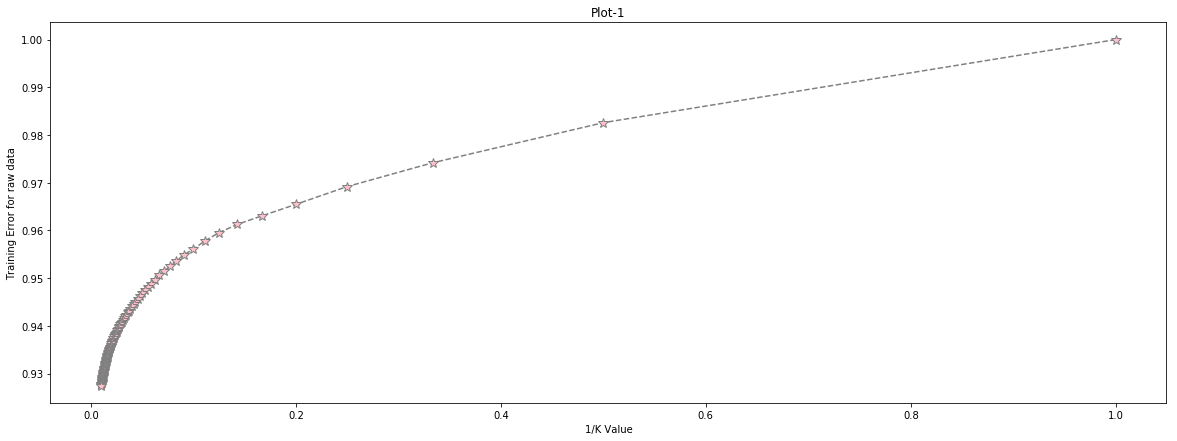

In [96]:
plt.figure(figsize=(20, 7))  
plt.plot([1/k for k in range(1,101)], train_error6, color='gray', linestyle='dashed', marker='*', markerfacecolor='pink', markersize=10)
plt.title('Plot-1')  
plt.xlabel('1/K Value')  
plt.ylabel('Training Error for raw data') 

Text(0, 0.5, 'Test Error for raw data')

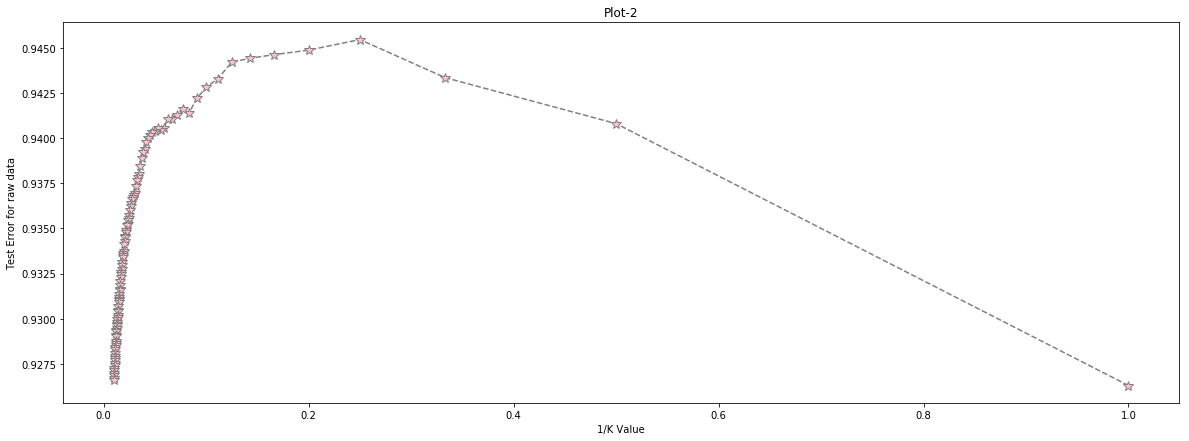

In [98]:
plt.figure(figsize=(20, 7))  
plt.plot([1/k for k in range(1,101)], test_error6, color='gray', linestyle='dashed', marker='*', markerfacecolor='pink', markersize=10)
plt.title('Plot-2')  
plt.xlabel('1/K Value')  
plt.ylabel('Test Error for raw data') 

Text(0, 0.5, 'Training Error for normalized data')

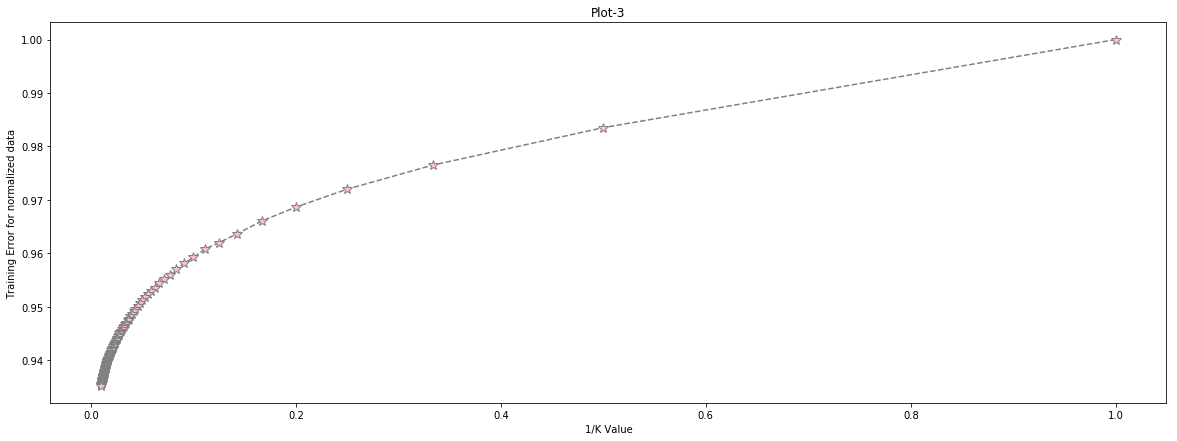

In [99]:
plt.figure(figsize=(20, 7))  
plt.plot([1/k for k in range(1,101)], train_error7, color='gray', linestyle='dashed', marker='*', markerfacecolor='pink', markersize=10)
plt.title('Plot-3')  
plt.xlabel('1/K Value')  
plt.ylabel('Training Error for normalized data') 

Text(0, 0.5, 'Test Error for Normalized data')

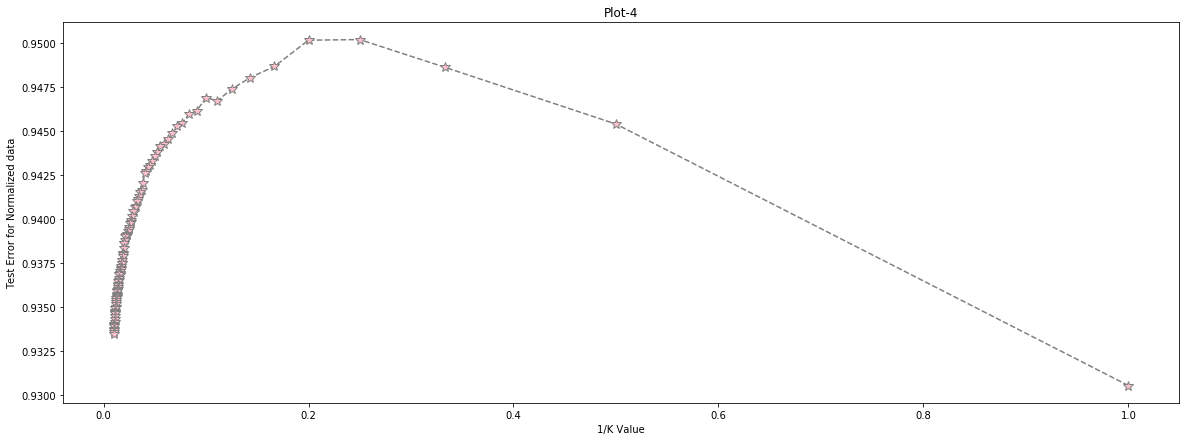

In [100]:
plt.figure(figsize=(20, 7))  
plt.plot([1/k for k in range(1,101)], test_error7, color='gray', linestyle='dashed', marker='*', markerfacecolor='pink', markersize=10)
plt.title('Plot-4')  
plt.xlabel('1/K Value')  
plt.ylabel('Test Error for Normalized data') 

__j. Comparing the results of KNN regression with linear regression__

In [129]:
print("Smallest test-error in linear regression: ",min(test_error1))

Smallest test-error in linear regression:  0.18087304487153566


In [128]:
test_error6 = np.append(test_error6,test_error7)
print("Smallest test-error in KNN regression: ",min(test_error6))

Smallest test-error in KNN regression:  0.9262901795027129


__From the above results, we can see that the Linear model produces a lesser test error compared to the KNN regressor model. So can conclude that linear regressor model is more efficient compared to KNN regressor model.__